# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

22:50:27 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=263151;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=88943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=21138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=289507;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

22:50:28 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=710361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=627037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

22:50:31 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=553248;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=386834;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

22:50:32 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=584649;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=971518;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

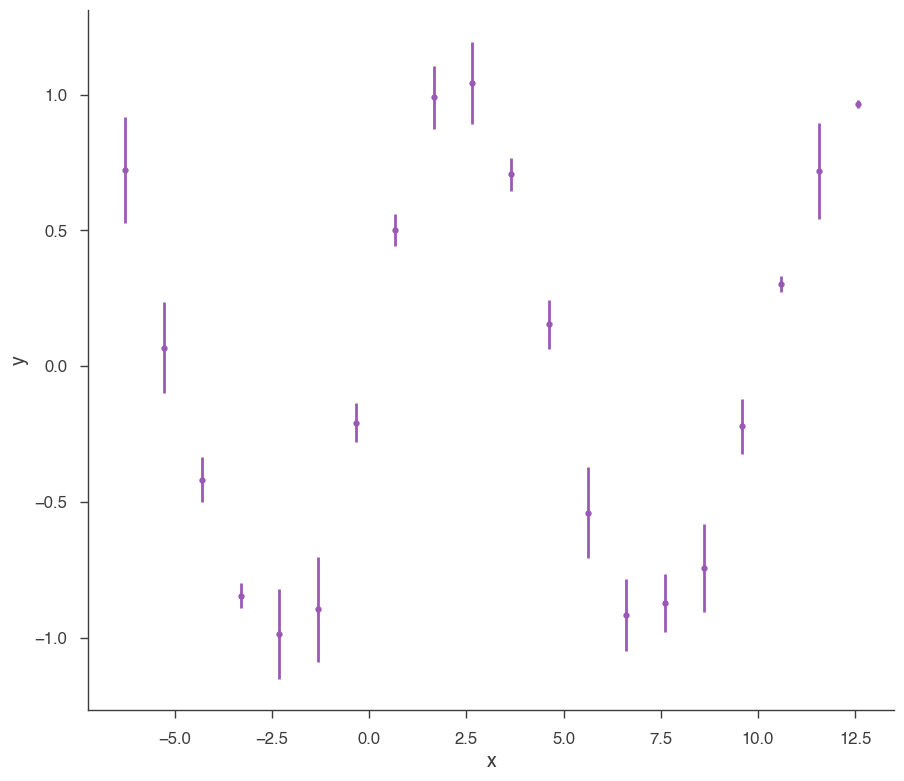

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=903878;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=697567;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

22:50:37 INFO      Mean acceptance fraction: 0.7169000000000001                                ]8;id=491672;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=947673;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

22:50:38 INFO      fit restored to maximum of posterior                                         ]8;id=582212;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=785400;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=988165;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=421223;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.67 -0.12 +0.11) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.95 -0.04 +0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-5.744901
total,-5.744901


Values of statistical measures:

,statistical measures
AIC,16.195684
BIC,17.481266
DIC,15.472338
PDIC,1.984830


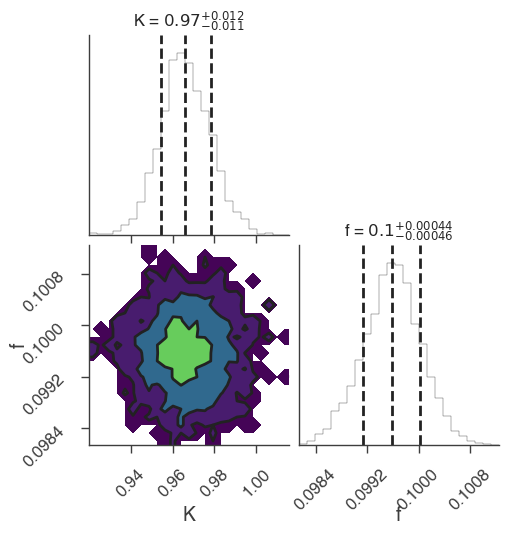

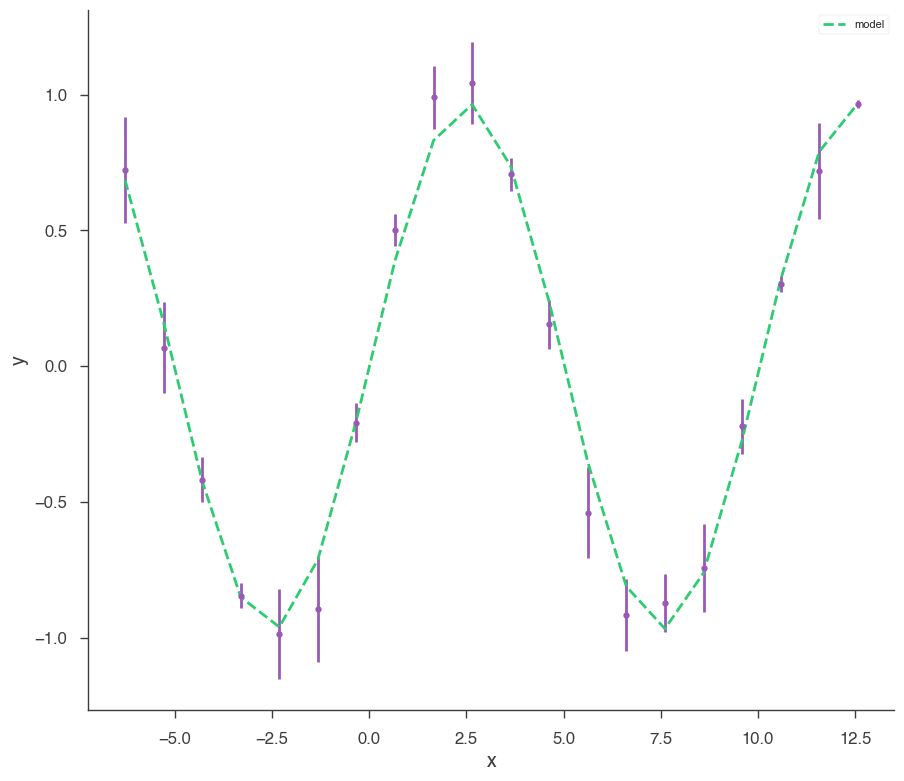

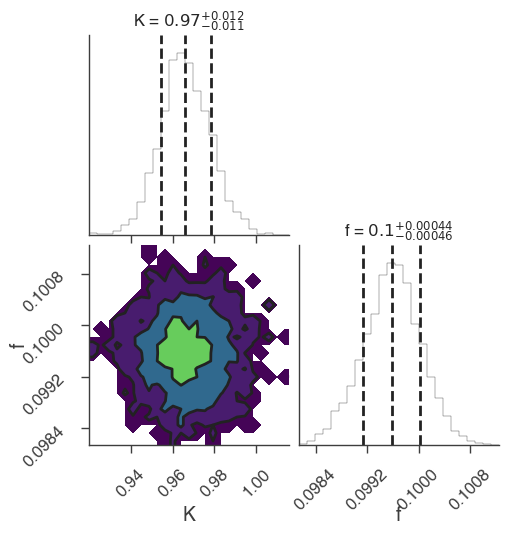

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

22:50:39 INFO      sampler set to multinest                                                ]8;id=807618;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=16182;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -15.521259499087950      +/-  0.14827102926471006     
 Total Likelihood Evaluations:         5624
 Sampling finished. Exiting MultiNest



22:50:40 INFO      fit restored to maximum of posterior                                         ]8;id=781341;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=11059;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=285765;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=368620;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.67 -0.12 +0.11) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.95 -0.04 +0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-5.745367
total,-5.745367


Values of statistical measures:

,statistical measures
AIC,16.196616
BIC,17.482198
DIC,15.436788
PDIC,1.973241
log(Z),-6.740797


         INFO      deleting the chain directory chains                                     ]8;id=346812;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=954965;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

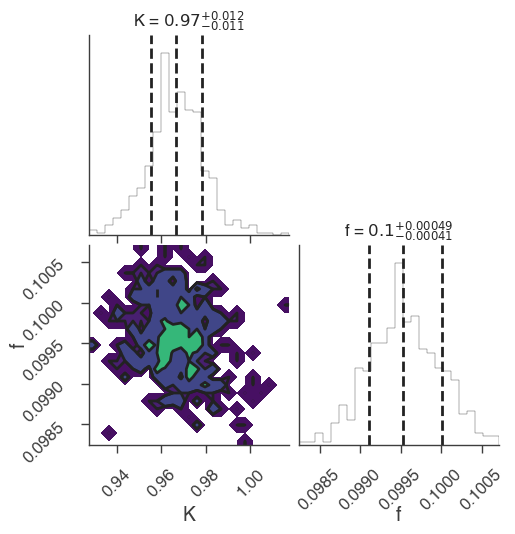

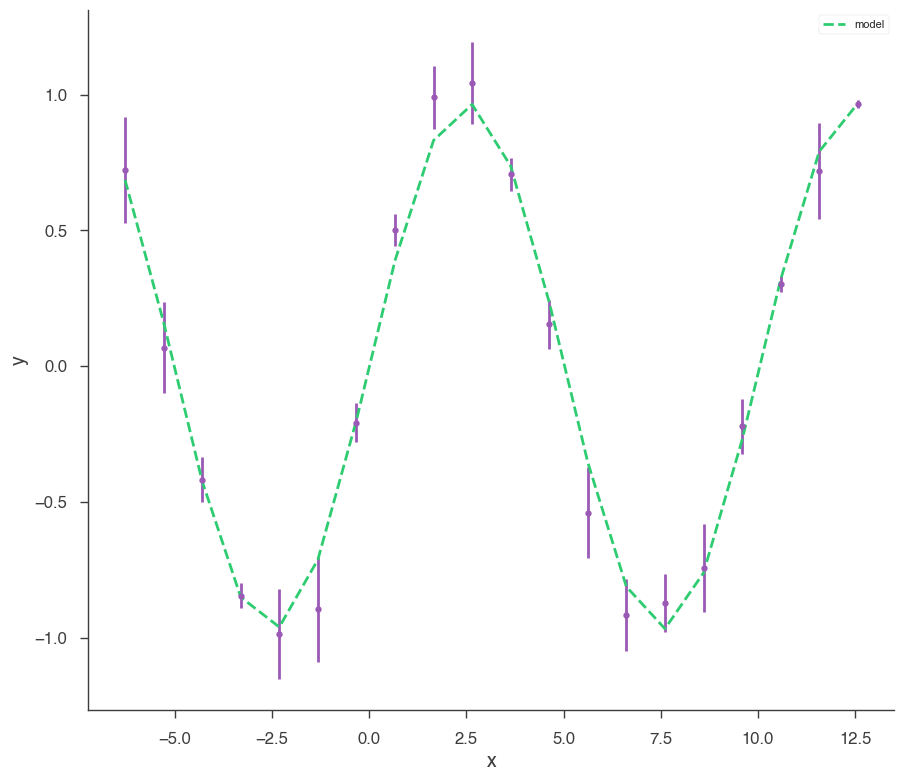

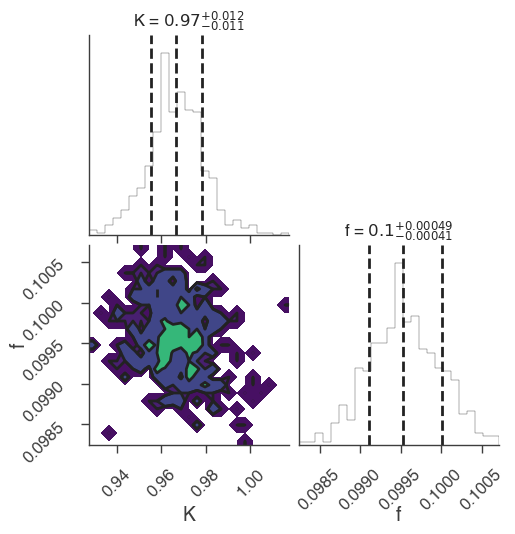

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

22:50:42 INFO      sampler set to dynesty_nested                                           ]8;id=786993;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=281576;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

157it [00:00, 1560.45it/s, bound: 0 | nc: 1 | ncall: 584 | eff(%): 26.884 | loglstar:   -inf < -5560.478 <    inf | logz: -5567.554 +/-  0.133 | dlogz: 5570.087 >  0.409]

314it [00:00, 1426.32it/s, bound: 0 | nc: 1 | ncall: 892 | eff(%): 35.202 | loglstar:   -inf < -2793.146 <    inf | logz: -2800.421 +/-  0.131 | dlogz: 2796.263 >  0.409]

467it [00:00, 1466.28it/s, bound: 0 | nc: 8 | ncall: 1290 | eff(%): 36.202 | loglstar:   -inf < -1910.470 <    inf | logz: -1917.268 +/-  0.129 | dlogz: 1911.423 >  0.409]

615it [00:00, 1162.54it/s, bound: 0 | nc: 2 | ncall: 1836 | eff(%): 33.497 | loglstar:   -inf < -1497.577 <    inf | logz: -1505.339 +/-  0.133 | dlogz: 1499.579 >  0.409]

739it [00:00, 963.63it/s, bound: 0 | nc: 7 | ncall: 2442 | eff(%): 30.262 | loglstar:   -inf < -1149.020 <    inf | logz: -1156.826 +/-  0.134 | dlogz: 1150.423 >  0.409] 

844it [00:00, 835.47it/s, bound: 0 | nc: 11 | ncall: 3241 | eff(%): 26.041 | loglstar:   -inf < -960.102 <    inf | logz: -968.892 +/-  0.148 | dlogz: 967.666 >  0.409]  

934it [00:00, 753.40it/s, bound: 0 | nc: 2 | ncall: 4112 | eff(%): 22.714 | loglstar:   -inf < -855.960 <    inf | logz: -863.548 +/-  0.134 | dlogz: 856.046 >  0.409] 

1014it [00:01, 599.79it/s, bound: 0 | nc: 14 | ncall: 4979 | eff(%): 20.366 | loglstar:   -inf < -792.392 <    inf | logz: -800.124 +/-  0.132 | dlogz: 792.328 >  0.409]

1080it [00:01, 517.59it/s, bound: 0 | nc: 14 | ncall: 5955 | eff(%): 18.136 | loglstar:   -inf < -742.743 <    inf | logz: -750.624 +/-  0.131 | dlogz: 742.592 >  0.409]

1137it [00:01, 407.82it/s, bound: 0 | nc: 13 | ncall: 7097 | eff(%): 16.021 | loglstar:   -inf < -711.072 <    inf | logz: -719.251 +/-  0.135 | dlogz: 711.154 >  0.409]

1183it [00:01, 352.99it/s, bound: 0 | nc: 26 | ncall: 8047 | eff(%): 14.701 | loglstar:   -inf < -687.848 <    inf | logz: -695.534 +/-  0.135 | dlogz: 687.125 >  0.409]

1222it [00:02, 315.36it/s, bound: 0 | nc: 1 | ncall: 8922 | eff(%): 13.696 | loglstar:   -inf < -673.310 <    inf | logz: -681.203 +/-  0.133 | dlogz: 672.688 >  0.409] 

1256it [00:02, 280.82it/s, bound: 0 | nc: 5 | ncall: 9637 | eff(%): 13.033 | loglstar:   -inf < -654.057 <    inf | logz: -662.571 +/-  0.140 | dlogz: 654.278 >  0.409]

1286it [00:02, 252.45it/s, bound: 0 | nc: 52 | ncall: 10351 | eff(%): 12.424 | loglstar:   -inf < -633.319 <    inf | logz: -641.723 +/-  0.137 | dlogz: 633.156 >  0.409]

1312it [00:02, 238.97it/s, bound: 0 | nc: 92 | ncall: 10781 | eff(%): 12.170 | loglstar:   -inf < -616.344 <    inf | logz: -625.095 +/-  0.140 | dlogz: 616.578 >  0.409]

1337it [00:02, 232.15it/s, bound: 0 | nc: 19 | ncall: 11267 | eff(%): 11.867 | loglstar:   -inf < -573.695 <    inf | logz: -583.193 +/-  0.148 | dlogz: 575.326 >  0.409]

1361it [00:02, 181.04it/s, bound: 0 | nc: 37 | ncall: 12268 | eff(%): 11.094 | loglstar:   -inf < -538.460 <    inf | logz: -548.514 +/-  0.157 | dlogz: 543.167 >  0.409]

1381it [00:03, 158.03it/s, bound: 0 | nc: 49 | ncall: 13220 | eff(%): 10.446 | loglstar:   -inf < -505.386 <    inf | logz: -515.417 +/-  0.155 | dlogz: 508.972 >  0.409]

1398it [00:03, 148.32it/s, bound: 0 | nc: 49 | ncall: 13742 | eff(%): 10.173 | loglstar:   -inf < -483.059 <    inf | logz: -492.744 +/-  0.151 | dlogz: 484.981 >  0.409]

1414it [00:03, 101.80it/s, bound: 1 | nc: 2 | ncall: 14118 | eff(%): 10.016 | loglstar:   -inf < -468.317 <    inf | logz: -477.765 +/-  0.144 | dlogz: 469.283 >  0.409] 

1488it [00:03, 181.81it/s, bound: 1 | nc: 2 | ncall: 14253 | eff(%): 10.440 | loglstar:   -inf < -385.451 <    inf | logz: -394.659 +/-  0.149 | dlogz: 386.005 >  0.409]

1583it [00:03, 313.14it/s, bound: 1 | nc: 2 | ncall: 14442 | eff(%): 10.961 | loglstar:   -inf < -302.842 <    inf | logz: -311.395 +/-  0.144 | dlogz: 301.936 >  0.409]

1626it [00:03, 325.47it/s, bound: 1 | nc: 1 | ncall: 14556 | eff(%): 11.171 | loglstar:   -inf < -279.570 <    inf | logz: -289.535 +/-  0.148 | dlogz: 280.623 >  0.409]

1692it [00:04, 317.48it/s, bound: 2 | nc: 1 | ncall: 14715 | eff(%): 11.498 | loglstar:   -inf < -236.388 <    inf | logz: -247.138 +/-  0.159 | dlogz: 239.260 >  0.409]

1839it [00:04, 543.47it/s, bound: 2 | nc: 3 | ncall: 14965 | eff(%): 12.289 | loglstar:   -inf < -162.008 <    inf | logz: -171.858 +/-  0.153 | dlogz: 162.129 >  0.409]

1966it [00:04, 702.12it/s, bound: 2 | nc: 1 | ncall: 15285 | eff(%): 12.862 | loglstar:   -inf < -116.316 <    inf | logz: -125.515 +/-  0.144 | dlogz: 115.008 >  0.409]

2054it [00:04, 610.60it/s, bound: 3 | nc: 1 | ncall: 15439 | eff(%): 13.304 | loglstar:   -inf < -90.931 <    inf | logz: -100.339 +/-  0.148 | dlogz: 89.612 >  0.409]  

2209it [00:04, 814.81it/s, bound: 3 | nc: 2 | ncall: 15717 | eff(%): 14.055 | loglstar:   -inf < -62.156 <    inf | logz: -72.333 +/-  0.146 | dlogz: 61.243 >  0.409] 

2308it [00:04, 590.45it/s, bound: 4 | nc: 1 | ncall: 15937 | eff(%): 14.482 | loglstar:   -inf < -49.404 <    inf | logz: -58.697 +/-  0.145 | dlogz: 47.234 >  0.409]

2430it [00:05, 709.23it/s, bound: 4 | nc: 2 | ncall: 16112 | eff(%): 15.082 | loglstar:   -inf < -37.547 <    inf | logz: -47.528 +/-  0.147 | dlogz: 35.801 >  0.409]

2537it [00:05, 785.05it/s, bound: 4 | nc: 2 | ncall: 16331 | eff(%): 15.535 | loglstar:   -inf < -30.960 <    inf | logz: -40.501 +/-  0.145 | dlogz: 28.439 >  0.409]

2634it [00:05, 590.77it/s, bound: 5 | nc: 1 | ncall: 16537 | eff(%): 15.928 | loglstar:   -inf < -26.062 <    inf | logz: -35.752 +/-  0.146 | dlogz: 23.445 >  0.409]

2797it [00:05, 790.04it/s, bound: 5 | nc: 1 | ncall: 16752 | eff(%): 16.697 | loglstar:   -inf < -19.408 <    inf | logz: -28.999 +/-  0.146 | dlogz: 16.261 >  0.409]

2916it [00:05, 875.03it/s, bound: 5 | nc: 4 | ncall: 16975 | eff(%): 17.178 | loglstar:   -inf < -15.713 <    inf | logz: -25.234 +/-  0.147 | dlogz: 12.188 >  0.409]

3024it [00:05, 764.90it/s, bound: 6 | nc: 1 | ncall: 17174 | eff(%): 17.608 | loglstar:   -inf < -13.418 <    inf | logz: -22.998 +/-  0.146 | dlogz:  9.678 >  0.409]

3234it [00:05, 1053.23it/s, bound: 6 | nc: 6 | ncall: 17504 | eff(%): 18.476 | loglstar:   -inf < -10.485 <    inf | logz: -19.968 +/-  0.146 | dlogz:  6.118 >  0.409]

3362it [00:06, 750.03it/s, bound: 7 | nc: 1 | ncall: 17753 | eff(%): 18.938 | loglstar:   -inf < -9.109 <    inf | logz: -18.803 +/-  0.146 | dlogz:  4.639 >  0.409]  

3467it [00:06, 805.54it/s, bound: 7 | nc: 2 | ncall: 17890 | eff(%): 19.380 | loglstar:   -inf < -8.376 <    inf | logz: -17.984 +/-  0.147 | dlogz:  3.574 >  0.409]

3638it [00:06, 995.62it/s, bound: 7 | nc: 1 | ncall: 18200 | eff(%): 19.989 | loglstar:   -inf < -7.571 <    inf | logz: -17.115 +/-  0.146 | dlogz:  2.358 >  0.409]

3762it [00:06, 769.37it/s, bound: 8 | nc: 1 | ncall: 18414 | eff(%): 20.430 | loglstar:   -inf < -7.101 <    inf | logz: -16.680 +/-  0.146 | dlogz:  1.712 >  0.409]

3887it [00:06, 861.95it/s, bound: 8 | nc: 1 | ncall: 18592 | eff(%): 20.907 | loglstar:   -inf < -6.767 <    inf | logz: -16.358 +/-  0.146 | dlogz:  1.225 >  0.409]

3995it [00:06, 890.54it/s, bound: 8 | nc: 3 | ncall: 18799 | eff(%): 21.251 | loglstar:   -inf < -6.534 <    inf | logz: -16.144 +/-  0.146 | dlogz:  0.909 >  0.409]

4100it [00:07, 584.59it/s, bound: 9 | nc: 1 | ncall: 18987 | eff(%): 21.594 | loglstar:   -inf < -6.366 <    inf | logz: -15.983 +/-  0.146 | dlogz:  0.678 >  0.409]

4223it [00:07, 695.81it/s, bound: 9 | nc: 2 | ncall: 19157 | eff(%): 22.044 | loglstar:   -inf < -6.220 <    inf | logz: -15.841 +/-  0.146 | dlogz:  0.482 >  0.409]

4282it [00:07, 573.93it/s, +400 | bound: 9 | nc: 1 | ncall: 19657 | eff(%): 24.313 | loglstar:   -inf < -5.779 <    inf | logz: -15.437 +/-  0.147 | dlogz:  0.001 >  0.409]

22:50:49 INFO      fit restored to maximum of posterior                                         ]8;id=335080;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=178453;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=210497;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=260116;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.67 -0.13 +0.14) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 -0.05 +0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-5.745509
total,-5.745509


Values of statistical measures:

,statistical measures
AIC,16.196900
BIC,17.482482
DIC,15.675243
PDIC,2.092524
log(Z),-6.704073


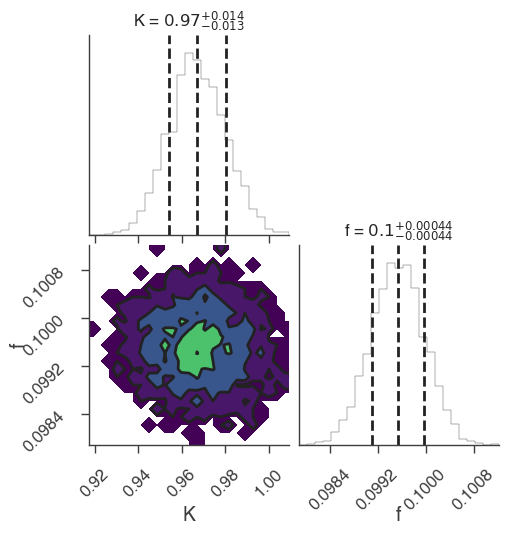

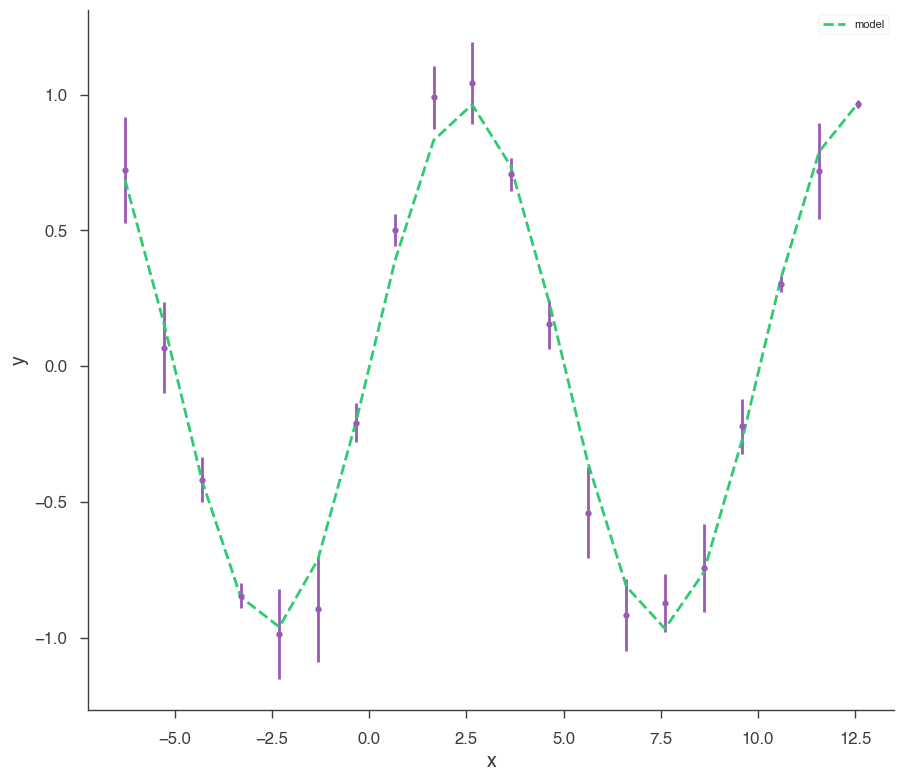

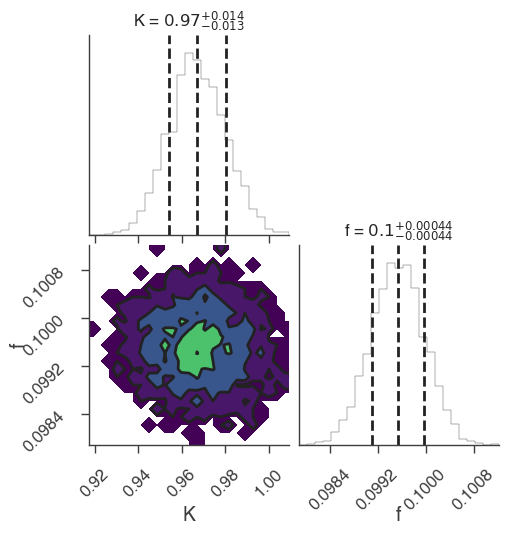

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

22:50:51 INFO      sampler set to dynesty_dynamic                                          ]8;id=294237;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=29741;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

1it [00:00,  8.34it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 1 | eff(%):  0.200 | loglstar:   -inf < -16117.344 <    inf | logz: -16124.254 +/-  0.117 | dlogz:    inf >  0.010]

162it [00:00, 875.47it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 187 | eff(%): 23.581 | loglstar:   -inf < -6698.926 <    inf | logz: -6706.156 +/-  0.120 | dlogz: 6697.365 >  0.010]

307it [00:00, 1123.02it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 416 | eff(%): 33.515 | loglstar:   -inf < -3765.759 <    inf | logz: -3773.280 +/-  0.123 | dlogz: 3765.866 >  0.010]

425it [00:00, 1135.18it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 644 | eff(%): 37.150 | loglstar:   -inf < -2651.024 <    inf | logz: -2658.693 +/-  0.122 | dlogz: 2644.831 >  0.010]

542it [00:00, 1012.21it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 927 | eff(%): 37.982 | loglstar:   -inf < -2036.706 <    inf | logz: -2044.697 +/-  0.126 | dlogz: 2045.674 >  0.010]

648it [00:00, 925.76it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 1275 | eff(%): 36.507 | loglstar:   -inf < -1706.002 <    inf | logz: -1713.136 +/-  0.119 | dlogz: 1696.781 >  0.010]

744it [00:00, 839.87it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 1706 | eff(%): 33.726 | loglstar:   -inf < -1542.135 <    inf | logz: -1550.470 +/-  0.127 | dlogz: 1541.119 >  0.010]

831it [00:00, 777.24it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 2179 | eff(%): 31.019 | loglstar:   -inf < -1390.013 <    inf | logz: -1398.320 +/-  0.124 | dlogz: 1387.543 >  0.010]

911it [00:01, 687.43it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 2714 | eff(%): 28.345 | loglstar:   -inf < -1230.550 <    inf | logz: -1238.110 +/-  0.120 | dlogz: 1225.955 >  0.010]

983it [00:01, 633.78it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 3225 | eff(%): 26.389 | loglstar:   -inf < -1094.798 <    inf | logz: -1103.417 +/-  0.126 | dlogz: 1092.200 >  0.010]

1049it [00:01, 597.41it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 3752 | eff(%): 24.671 | loglstar:   -inf < -998.035 <    inf | logz: -1005.977 +/-  0.125 | dlogz: 993.852 >  0.010]

1110it [00:01, 552.93it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 4269 | eff(%): 23.275 | loglstar:   -inf < -930.306 <    inf | logz: -938.386 +/-  0.122 | dlogz: 925.947 >  0.010] 

1167it [00:01, 469.60it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 4932 | eff(%): 21.484 | loglstar:   -inf < -871.897 <    inf | logz: -879.653 +/-  0.120 | dlogz: 866.772 >  0.010] 

1216it [00:01, 447.83it/s, batch: 0 | bound: 0 | nc: 19 | ncall: 5556 | eff(%): 20.079 | loglstar:   -inf < -835.026 <    inf | logz: -843.537 +/-  0.122 | dlogz: 830.840 >  0.010]

1262it [00:01, 404.25it/s, batch: 0 | bound: 0 | nc: 16 | ncall: 6150 | eff(%): 18.977 | loglstar:   -inf < -800.397 <    inf | logz: -808.323 +/-  0.118 | dlogz: 795.142 >  0.010]

1304it [00:02, 374.21it/s, batch: 0 | bound: 0 | nc: 26 | ncall: 6767 | eff(%): 17.944 | loglstar:   -inf < -771.004 <    inf | logz: -778.853 +/-  0.118 | dlogz: 765.528 >  0.010]

1342it [00:02, 325.88it/s, batch: 0 | bound: 0 | nc: 21 | ncall: 7364 | eff(%): 17.065 | loglstar:   -inf < -749.654 <    inf | logz: -758.254 +/-  0.121 | dlogz: 745.222 >  0.010]

1376it [00:02, 303.80it/s, batch: 0 | bound: 0 | nc: 27 | ncall: 7980 | eff(%): 16.226 | loglstar:   -inf < -727.636 <    inf | logz: -736.669 +/-  0.128 | dlogz: 724.023 >  0.010]

1407it [00:02, 303.33it/s, batch: 0 | bound: 0 | nc: 16 | ncall: 8523 | eff(%): 15.593 | loglstar:   -inf < -717.194 <    inf | logz: -724.711 +/-  0.118 | dlogz: 711.040 >  0.010]

1438it [00:02, 280.46it/s, batch: 0 | bound: 0 | nc: 23 | ncall: 9077 | eff(%): 15.015 | loglstar:   -inf < -705.713 <    inf | logz: -713.993 +/-  0.120 | dlogz: 700.411 >  0.010]

1467it [00:02, 260.50it/s, batch: 0 | bound: 0 | nc: 31 | ncall: 9595 | eff(%): 14.532 | loglstar:   -inf < -694.211 <    inf | logz: -702.346 +/-  0.119 | dlogz: 693.867 >  0.010]

1494it [00:02, 234.19it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 10055 | eff(%): 14.154 | loglstar:   -inf < -683.687 <    inf | logz: -691.763 +/-  0.123 | dlogz: 683.257 >  0.010]

1518it [00:03, 230.58it/s, batch: 0 | bound: 0 | nc: 30 | ncall: 10497 | eff(%): 13.804 | loglstar:   -inf < -677.693 <    inf | logz: -685.122 +/-  0.117 | dlogz: 676.355 >  0.010]

1542it [00:03, 225.45it/s, batch: 0 | bound: 0 | nc: 49 | ncall: 10924 | eff(%): 13.498 | loglstar:   -inf < -670.739 <    inf | logz: -679.338 +/-  0.121 | dlogz: 670.794 >  0.010]

1565it [00:03, 201.80it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 11537 | eff(%): 13.002 | loglstar:   -inf < -661.421 <    inf | logz: -669.339 +/-  0.120 | dlogz: 660.569 >  0.010] 

1586it [00:03, 182.62it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 12171 | eff(%): 12.517 | loglstar:   -inf < -654.242 <    inf | logz: -662.222 +/-  0.119 | dlogz: 653.398 >  0.010]

1605it [00:03, 176.98it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 12586 | eff(%): 12.265 | loglstar:   -inf < -645.793 <    inf | logz: -654.078 +/-  0.124 | dlogz: 645.349 >  0.010] 

1623it [00:03, 168.91it/s, batch: 0 | bound: 0 | nc: 23 | ncall: 13031 | eff(%): 11.995 | loglstar:   -inf < -636.233 <    inf | logz: -645.384 +/-  0.131 | dlogz: 637.233 >  0.010]

1640it [00:03, 165.14it/s, batch: 0 | bound: 0 | nc: 27 | ncall: 13401 | eff(%): 11.798 | loglstar:   -inf < -629.195 <    inf | logz: -638.042 +/-  0.123 | dlogz: 629.308 >  0.010]

1657it [00:03, 158.01it/s, batch: 0 | bound: 0 | nc: 41 | ncall: 13906 | eff(%): 11.502 | loglstar:   -inf < -621.794 <    inf | logz: -629.949 +/-  0.124 | dlogz: 621.005 >  0.010]

1677it [00:04, 168.13it/s, batch: 0 | bound: 0 | nc: 22 | ncall: 14327 | eff(%): 11.310 | loglstar:   -inf < -613.335 <    inf | logz: -622.058 +/-  0.125 | dlogz: 613.272 >  0.010]

1694it [00:04, 148.11it/s, batch: 0 | bound: 0 | nc: 16 | ncall: 14918 | eff(%): 10.987 | loglstar:   -inf < -582.842 <    inf | logz: -592.189 +/-  0.134 | dlogz: 584.024 >  0.010]

1710it [00:04, 144.47it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 15478 | eff(%): 10.702 | loglstar:   -inf < -565.429 <    inf | logz: -575.655 +/-  0.140 | dlogz: 569.034 >  0.010] 

1725it [00:04, 129.21it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 16059 | eff(%): 10.417 | loglstar:   -inf < -549.968 <    inf | logz: -559.421 +/-  0.132 | dlogz: 550.966 >  0.010]

1739it [00:04, 114.66it/s, batch: 0 | bound: 0 | nc: 48 | ncall: 16635 | eff(%): 10.149 | loglstar:   -inf < -536.030 <    inf | logz: -545.712 +/-  0.133 | dlogz: 537.299 >  0.010]

1755it [00:04, 124.48it/s, batch: 0 | bound: 0 | nc: 61 | ncall: 17064 | eff(%):  9.992 | loglstar:   -inf < -519.600 <    inf | logz: -528.692 +/-  0.129 | dlogz: 519.877 >  0.010]

1769it [00:04, 91.23it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17087 | eff(%): 10.059 | loglstar:   -inf < -499.187 <    inf | logz: -508.320 +/-  0.133 | dlogz: 499.637 >  0.010]  

1856it [00:05, 248.15it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17220 | eff(%): 10.474 | loglstar:   -inf < -409.396 <    inf | logz: -418.585 +/-  0.132 | dlogz: 409.578 >  0.010]

1897it [00:05, 284.29it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 17297 | eff(%): 10.659 | loglstar:   -inf < -386.976 <    inf | logz: -396.449 +/-  0.130 | dlogz: 387.450 >  0.010]

1998it [00:05, 458.64it/s, batch: 0 | bound: 1 | nc: 12 | ncall: 17520 | eff(%): 11.088 | loglstar:   -inf < -308.972 <    inf | logz: -318.486 +/-  0.134 | dlogz: 309.274 >  0.010]

2100it [00:05, 600.62it/s, batch: 0 | bound: 1 | nc: 4 | ncall: 17737 | eff(%): 11.515 | loglstar:   -inf < -254.179 <    inf | logz: -263.499 +/-  0.131 | dlogz: 253.799 >  0.010] 

2169it [00:05, 338.97it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 17882 | eff(%): 11.800 | loglstar:   -inf < -213.463 <    inf | logz: -223.321 +/-  0.131 | dlogz: 213.512 >  0.010]

2334it [00:05, 564.04it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 18215 | eff(%): 12.471 | loglstar:   -inf < -150.977 <    inf | logz: -161.225 +/-  0.132 | dlogz: 151.079 >  0.010]

2458it [00:06, 696.75it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18527 | eff(%): 12.918 | loglstar:   -inf < -117.547 <    inf | logz: -126.699 +/-  0.129 | dlogz: 116.027 >  0.010]

2556it [00:06, 523.07it/s, batch: 0 | bound: 3 | nc: 3 | ncall: 18701 | eff(%): 13.312 | loglstar:   -inf < -99.015 <    inf | logz: -108.964 +/-  0.133 | dlogz: 98.207 >  0.010]  

2675it [00:06, 641.37it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 18906 | eff(%): 13.784 | loglstar:   -inf < -80.230 <    inf | logz: -89.796 +/-  0.131 | dlogz: 78.737 >  0.010] 

2766it [00:06, 683.51it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19119 | eff(%): 14.099 | loglstar:   -inf < -66.469 <    inf | logz: -76.595 +/-  0.135 | dlogz: 65.445 >  0.010]

2855it [00:06, 541.37it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19329 | eff(%): 14.398 | loglstar:   -inf < -56.630 <    inf | logz: -66.240 +/-  0.131 | dlogz: 54.803 >  0.010]

2966it [00:06, 649.36it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19480 | eff(%): 14.845 | loglstar:   -inf < -46.679 <    inf | logz: -56.245 +/-  0.132 | dlogz: 44.562 >  0.010]

3072it [00:06, 735.13it/s, batch: 0 | bound: 4 | nc: 6 | ncall: 19652 | eff(%): 15.244 | loglstar:   -inf < -40.003 <    inf | logz: -49.814 +/-  0.131 | dlogz: 37.917 >  0.010]

3188it [00:07, 833.79it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 19891 | eff(%): 15.634 | loglstar:   -inf < -32.281 <    inf | logz: -42.131 +/-  0.133 | dlogz: 29.991 >  0.010]

3286it [00:07, 605.09it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20094 | eff(%): 15.956 | loglstar:   -inf < -27.148 <    inf | logz: -36.884 +/-  0.132 | dlogz: 24.531 >  0.010]

3420it [00:07, 750.24it/s, batch: 0 | bound: 5 | nc: 3 | ncall: 20265 | eff(%): 16.470 | loglstar:   -inf < -21.843 <    inf | logz: -31.708 +/-  0.132 | dlogz: 19.081 >  0.010]

3562it [00:07, 897.30it/s, batch: 0 | bound: 5 | nc: 2 | ncall: 20494 | eff(%): 16.967 | loglstar:   -inf < -18.005 <    inf | logz: -27.643 +/-  0.132 | dlogz: 14.716 >  0.010]

3672it [00:07, 930.83it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20740 | eff(%): 17.288 | loglstar:   -inf < -15.689 <    inf | logz: -25.315 +/-  0.131 | dlogz: 12.210 >  0.010]

3780it [00:07, 708.84it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 20913 | eff(%): 17.653 | loglstar:   -inf < -14.177 <    inf | logz: -23.661 +/-  0.130 | dlogz: 10.335 >  0.010]

3928it [00:08, 869.12it/s, batch: 0 | bound: 6 | nc: 3 | ncall: 21113 | eff(%): 18.174 | loglstar:   -inf < -11.716 <    inf | logz: -21.523 +/-  0.132 | dlogz:  7.910 >  0.010]

4050it [00:08, 949.56it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21391 | eff(%): 18.501 | loglstar:   -inf < -10.346 <    inf | logz: -20.067 +/-  0.132 | dlogz:  6.207 >  0.010]

4161it [00:08, 651.42it/s, batch: 0 | bound: 7 | nc: 3 | ncall: 21609 | eff(%): 18.820 | loglstar:   -inf < -9.443 <    inf | logz: -19.057 +/-  0.132 | dlogz:  4.978 >  0.010] 

4281it [00:08, 754.05it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21780 | eff(%): 19.215 | loglstar:   -inf < -8.721 <    inf | logz: -18.290 +/-  0.131 | dlogz:  3.980 >  0.010]

4440it [00:08, 931.22it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22043 | eff(%): 19.696 | loglstar:   -inf < -7.988 <    inf | logz: -17.544 +/-  0.131 | dlogz:  2.951 >  0.010]

4566it [00:08, 1006.84it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 22306 | eff(%): 20.021 | loglstar:   -inf < -7.498 <    inf | logz: -17.095 +/-  0.131 | dlogz:  2.300 >  0.010]

4685it [00:09, 659.44it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22463 | eff(%): 20.402 | loglstar:   -inf < -7.107 <    inf | logz: -16.743 +/-  0.131 | dlogz:  1.790 >  0.010] 

4813it [00:09, 772.22it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22660 | eff(%): 20.782 | loglstar:   -inf < -6.827 <    inf | logz: -16.447 +/-  0.131 | dlogz:  1.354 >  0.010]

4917it [00:09, 812.63it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22884 | eff(%): 21.027 | loglstar:   -inf < -6.622 <    inf | logz: -16.258 +/-  0.131 | dlogz:  1.076 >  0.010]

5019it [00:09, 616.67it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23087 | eff(%): 21.279 | loglstar:   -inf < -6.478 <    inf | logz: -16.105 +/-  0.131 | dlogz:  0.856 >  0.010]

5182it [00:09, 806.36it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23286 | eff(%): 21.786 | loglstar:   -inf < -6.286 <    inf | logz: -15.919 +/-  0.131 | dlogz:  0.593 >  0.010]

5344it [00:09, 976.97it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23552 | eff(%): 22.219 | loglstar:   -inf < -6.144 <    inf | logz: -15.784 +/-  0.131 | dlogz:  0.414 >  0.010]

5467it [00:10, 720.64it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 23842 | eff(%): 22.459 | loglstar:   -inf < -6.067 <    inf | logz: -15.707 +/-  0.131 | dlogz:  0.315 >  0.010]

5649it [00:10, 925.69it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 24070 | eff(%): 22.991 | loglstar:   -inf < -5.979 <    inf | logz: -15.622 +/-  0.131 | dlogz:  0.212 >  0.010]

5774it [00:10, 994.00it/s, batch: 0 | bound: 10 | nc: 3 | ncall: 24291 | eff(%): 23.291 | loglstar:   -inf < -5.936 <    inf | logz: -15.579 +/-  0.131 | dlogz:  0.163 >  0.010]

5898it [00:10, 675.96it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 24582 | eff(%): 23.515 | loglstar:   -inf < -5.900 <    inf | logz: -15.546 +/-  0.131 | dlogz:  0.125 >  0.010]

6025it [00:10, 779.77it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 24747 | eff(%): 23.864 | loglstar:   -inf < -5.872 <    inf | logz: -15.520 +/-  0.131 | dlogz:  0.096 >  0.010]

6150it [00:10, 872.83it/s, batch: 0 | bound: 11 | nc: 4 | ncall: 24940 | eff(%): 24.175 | loglstar:   -inf < -5.852 <    inf | logz: -15.500 +/-  0.131 | dlogz:  0.074 >  0.010]

6270it [00:10, 941.58it/s, batch: 0 | bound: 11 | nc: 5 | ncall: 25163 | eff(%): 24.432 | loglstar:   -inf < -5.835 <    inf | logz: -15.484 +/-  0.131 | dlogz:  0.058 >  0.010]

6384it [00:11, 759.27it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25373 | eff(%): 24.674 | loglstar:   -inf < -5.824 <    inf | logz: -15.473 +/-  0.131 | dlogz:  0.046 >  0.010]

6561it [00:11, 969.81it/s, batch: 0 | bound: 12 | nc: 2 | ncall: 25635 | eff(%): 25.104 | loglstar:   -inf < -5.811 <    inf | logz: -15.460 +/-  0.131 | dlogz:  0.032 >  0.010]

6702it [00:11, 1067.69it/s, batch: 0 | bound: 12 | nc: 4 | ncall: 25931 | eff(%): 25.357 | loglstar:   -inf < -5.802 <    inf | logz: -15.452 +/-  0.131 | dlogz:  0.024 >  0.010]

6828it [00:11, 711.67it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26146 | eff(%): 25.625 | loglstar:   -inf < -5.797 <    inf | logz: -15.447 +/-  0.131 | dlogz:  0.019 >  0.010] 

6946it [00:11, 796.88it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26313 | eff(%): 25.905 | loglstar:   -inf < -5.793 <    inf | logz: -15.443 +/-  0.131 | dlogz:  0.015 >  0.010]

7051it [00:11, 711.96it/s, batch: 0 | bound: 13 | nc: 2 | ncall: 26499 | eff(%): 26.116 | loglstar:   -inf < -5.790 <    inf | logz: -15.440 +/-  0.131 | dlogz:  0.012 >  0.010]

7141it [00:12, 733.12it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26678 | eff(%): 26.278 | loglstar:   -inf < -5.788 <    inf | logz: -15.438 +/-  0.131 | dlogz:  0.010 >  0.010]

7430it [00:12, 1201.97it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26967 | eff(%): 27.341 | loglstar:   -inf < -5.783 <    inf | logz: -15.432 +/-  0.131 | dlogz:  0.004 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7638it [00:15, 185.65it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 27175 | eff(%): 28.107 | loglstar: -7.625 < -6.416 < -6.286 | logz: -15.428 +/-  0.135 | stop:  1.238]            

7744it [00:15, 217.30it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 27308 | eff(%): 27.778 | loglstar: -7.625 < -7.231 < -6.286 | logz: -15.428 +/-  0.135 | stop:  1.238]

7849it [00:15, 264.00it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27483 | eff(%): 27.979 | loglstar: -7.625 < -6.964 < -6.286 | logz: -15.428 +/-  0.135 | stop:  1.238]

7946it [00:15, 315.21it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27637 | eff(%): 28.170 | loglstar: -7.625 < -6.749 < -6.286 | logz: -15.428 +/-  0.135 | stop:  1.238]

8042it [00:15, 366.16it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27862 | eff(%): 28.285 | loglstar: -7.625 < -6.585 < -6.286 | logz: -15.428 +/-  0.135 | stop:  1.238]

8131it [00:15, 358.18it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27990 | eff(%): 28.470 | loglstar: -7.625 < -6.442 < -6.286 | logz: -15.428 +/-  0.135 | stop:  1.238]

8343it [00:15, 574.70it/s, batch: 1 | bound: 3 | nc: 2 | ncall: 28256 | eff(%): 29.028 | loglstar: -7.625 < -6.217 < -6.286 | logz: -15.428 +/-  0.135 | stop:  1.238]

8723it [00:15, 1056.26it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28683 | eff(%): 30.350 | loglstar: -7.625 < -5.838 < -6.286 | logz: -15.428 +/-  0.135 | stop:  1.238]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8917it [00:17, 375.93it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 28925 | eff(%): 30.307 | loglstar: -8.124 < -7.537 < -7.623 | logz: -15.424 +/-  0.111 | stop:  1.054] 

9308it [00:17, 631.39it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29336 | eff(%): 31.636 | loglstar: -8.124 < -6.094 < -7.623 | logz: -15.424 +/-  0.111 | stop:  1.054]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9394it [00:18, 514.19it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29422 | eff(%): 31.928 | loglstar: -8.124 < -5.780 < -7.623 | logz: -15.424 +/-  0.111 | stop:  0.968]

22:51:10 INFO      fit restored to maximum of posterior                                         ]8;id=191737;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=101177;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=818583;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=435714;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.67 -0.12 +0.13) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 +/- 0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-5.745109
total,-5.745109


Values of statistical measures:

,statistical measures
AIC,16.196101
BIC,17.481683
DIC,15.567816
PDIC,2.038645
log(Z),-6.699560


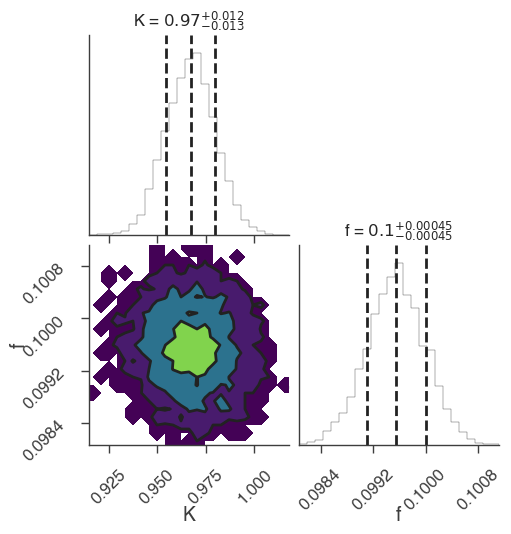

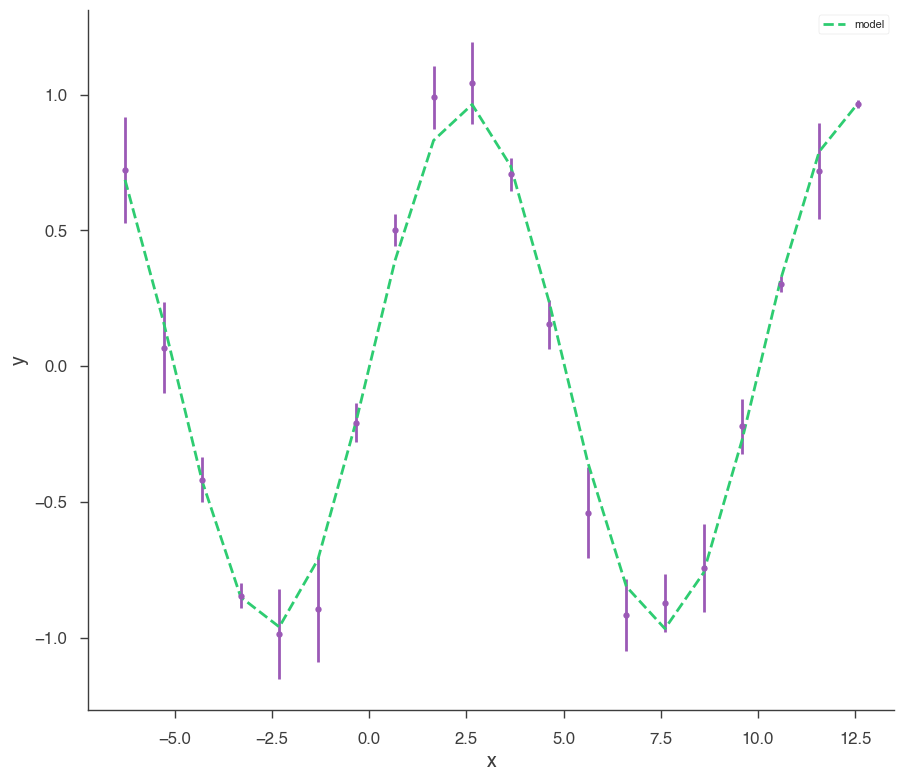

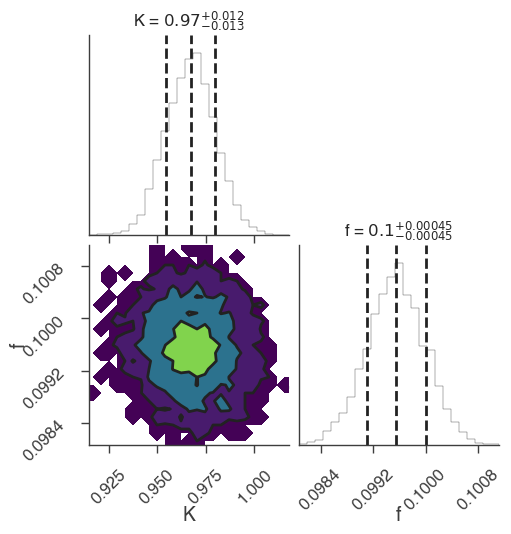

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

22:51:11 INFO      sampler set to zeus                                                     ]8;id=465432;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=826586;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 4/625 [00:00<00:18, 33.98it/s]

Sampling progress :   1%|▏         | 8/625 [00:00<00:20, 30.20it/s]

Sampling progress :   2%|▏         | 12/625 [00:00<00:21, 28.92it/s]

Sampling progress :   2%|▏         | 15/625 [00:00<00:21, 28.37it/s]

Sampling progress :   3%|▎         | 18/625 [00:00<00:21, 28.00it/s]

Sampling progress :   3%|▎         | 21/625 [00:00<00:22, 27.00it/s]

Sampling progress :   4%|▍         | 25/625 [00:00<00:20, 29.94it/s]

Sampling progress :   5%|▍         | 29/625 [00:00<00:18, 32.30it/s]

Sampling progress :   5%|▌         | 33/625 [00:01<00:17, 33.09it/s]

Sampling progress :   6%|▌         | 37/625 [00:01<00:17, 34.52it/s]

Sampling progress :   7%|▋         | 41/625 [00:01<00:18, 31.15it/s]

Sampling progress :   7%|▋         | 45/625 [00:01<00:18, 31.98it/s]

Sampling progress :   8%|▊         | 50/625 [00:01<00:16, 35.03it/s]

Sampling progress :   9%|▉         | 55/625 [00:01<00:15, 36.99it/s]

Sampling progress :  10%|▉         | 61/625 [00:01<00:13, 40.55it/s]

Sampling progress :  11%|█         | 66/625 [00:01<00:14, 39.64it/s]

Sampling progress :  11%|█         | 70/625 [00:02<00:14, 38.64it/s]

Sampling progress :  12%|█▏        | 74/625 [00:02<00:14, 38.89it/s]

Sampling progress :  12%|█▏        | 78/625 [00:02<00:14, 37.32it/s]

Sampling progress :  13%|█▎        | 83/625 [00:02<00:13, 39.04it/s]

Sampling progress :  14%|█▍        | 87/625 [00:02<00:13, 39.06it/s]

Sampling progress :  15%|█▍        | 92/625 [00:02<00:13, 40.92it/s]

Sampling progress :  16%|█▌        | 97/625 [00:02<00:12, 42.63it/s]

Sampling progress :  16%|█▋        | 102/625 [00:02<00:12, 41.17it/s]

Sampling progress :  17%|█▋        | 107/625 [00:02<00:12, 40.49it/s]

Sampling progress :  18%|█▊        | 112/625 [00:03<00:12, 40.78it/s]

Sampling progress :  19%|█▊        | 117/625 [00:03<00:12, 39.33it/s]

Sampling progress :  19%|█▉        | 121/625 [00:03<00:13, 37.28it/s]

Sampling progress :  20%|██        | 125/625 [00:03<00:13, 37.69it/s]

Sampling progress :  21%|██        | 129/625 [00:03<00:13, 37.72it/s]

Sampling progress :  21%|██▏       | 134/625 [00:03<00:12, 40.08it/s]

Sampling progress :  22%|██▏       | 139/625 [00:03<00:11, 41.05it/s]

Sampling progress :  23%|██▎       | 145/625 [00:03<00:10, 44.93it/s]

Sampling progress :  24%|██▍       | 150/625 [00:04<00:11, 43.18it/s]

Sampling progress :  25%|██▍       | 155/625 [00:04<00:11, 42.07it/s]

Sampling progress :  26%|██▌       | 160/625 [00:04<00:11, 41.93it/s]

Sampling progress :  26%|██▋       | 165/625 [00:04<00:11, 40.91it/s]

Sampling progress :  27%|██▋       | 170/625 [00:04<00:10, 42.50it/s]

Sampling progress :  28%|██▊       | 175/625 [00:04<00:10, 42.42it/s]

Sampling progress :  29%|██▉       | 180/625 [00:04<00:10, 41.94it/s]

Sampling progress :  30%|██▉       | 185/625 [00:04<00:11, 36.99it/s]

Sampling progress :  30%|███       | 190/625 [00:05<00:11, 38.63it/s]

Sampling progress :  31%|███       | 195/625 [00:05<00:10, 39.98it/s]

Sampling progress :  32%|███▏      | 200/625 [00:05<00:10, 41.05it/s]

Sampling progress :  33%|███▎      | 205/625 [00:05<00:10, 39.72it/s]

Sampling progress :  34%|███▎      | 210/625 [00:05<00:10, 38.35it/s]

Sampling progress :  34%|███▍      | 215/625 [00:05<00:10, 40.82it/s]

Sampling progress :  35%|███▌      | 220/625 [00:05<00:10, 39.85it/s]

Sampling progress :  36%|███▋      | 227/625 [00:05<00:08, 45.68it/s]

Sampling progress :  37%|███▋      | 232/625 [00:06<00:10, 37.80it/s]

Sampling progress :  38%|███▊      | 237/625 [00:06<00:11, 34.41it/s]

Sampling progress :  39%|███▊      | 241/625 [00:06<00:11, 32.81it/s]

Sampling progress :  39%|███▉      | 245/625 [00:06<00:13, 29.12it/s]

Sampling progress :  40%|███▉      | 249/625 [00:06<00:12, 29.28it/s]

Sampling progress :  40%|████      | 253/625 [00:06<00:12, 30.91it/s]

Sampling progress :  41%|████      | 257/625 [00:06<00:12, 30.24it/s]

Sampling progress :  42%|████▏     | 261/625 [00:07<00:12, 28.11it/s]

Sampling progress :  42%|████▏     | 264/625 [00:07<00:13, 26.59it/s]

Sampling progress :  43%|████▎     | 268/625 [00:07<00:12, 28.19it/s]

Sampling progress :  43%|████▎     | 271/625 [00:07<00:14, 24.65it/s]

Sampling progress :  44%|████▍     | 274/625 [00:07<00:21, 16.47it/s]

Sampling progress :  44%|████▍     | 277/625 [00:08<00:20, 17.40it/s]

Sampling progress :  45%|████▍     | 281/625 [00:08<00:16, 20.77it/s]

Sampling progress :  46%|████▌     | 285/625 [00:08<00:14, 24.24it/s]

Sampling progress :  46%|████▋     | 290/625 [00:08<00:11, 28.61it/s]

Sampling progress :  47%|████▋     | 294/625 [00:08<00:10, 30.97it/s]

Sampling progress :  48%|████▊     | 298/625 [00:08<00:09, 33.10it/s]

Sampling progress :  48%|████▊     | 302/625 [00:08<00:09, 32.34it/s]

Sampling progress :  49%|████▉     | 306/625 [00:08<00:09, 33.76it/s]

Sampling progress :  50%|████▉     | 311/625 [00:08<00:08, 36.95it/s]

Sampling progress :  51%|█████     | 316/625 [00:09<00:07, 39.96it/s]

Sampling progress :  51%|█████▏    | 321/625 [00:09<00:07, 42.11it/s]

Sampling progress :  52%|█████▏    | 326/625 [00:09<00:06, 43.01it/s]

Sampling progress :  53%|█████▎    | 331/625 [00:09<00:07, 39.74it/s]

Sampling progress :  54%|█████▍    | 336/625 [00:09<00:07, 40.45it/s]

Sampling progress :  55%|█████▍    | 341/625 [00:09<00:06, 42.57it/s]

Sampling progress :  56%|█████▌    | 347/625 [00:09<00:06, 45.21it/s]

Sampling progress :  56%|█████▋    | 353/625 [00:09<00:05, 48.58it/s]

Sampling progress :  57%|█████▋    | 359/625 [00:09<00:05, 51.41it/s]

Sampling progress :  59%|█████▊    | 366/625 [00:10<00:04, 54.22it/s]

Sampling progress :  60%|█████▉    | 372/625 [00:10<00:05, 44.91it/s]

Sampling progress :  60%|██████    | 377/625 [00:10<00:05, 44.18it/s]

Sampling progress :  61%|██████    | 382/625 [00:10<00:05, 43.16it/s]

Sampling progress :  62%|██████▏   | 387/625 [00:10<00:05, 40.34it/s]

Sampling progress :  63%|██████▎   | 392/625 [00:10<00:05, 38.90it/s]

Sampling progress :  64%|██████▎   | 397/625 [00:10<00:05, 40.97it/s]

Sampling progress :  64%|██████▍   | 402/625 [00:11<00:05, 40.83it/s]

Sampling progress :  65%|██████▌   | 407/625 [00:11<00:05, 41.90it/s]

Sampling progress :  66%|██████▌   | 412/625 [00:11<00:04, 42.82it/s]

Sampling progress :  67%|██████▋   | 418/625 [00:11<00:04, 44.47it/s]

Sampling progress :  68%|██████▊   | 423/625 [00:11<00:04, 42.43it/s]

Sampling progress :  68%|██████▊   | 428/625 [00:11<00:05, 39.17it/s]

Sampling progress :  69%|██████▉   | 432/625 [00:11<00:05, 33.57it/s]

Sampling progress :  70%|██████▉   | 436/625 [00:11<00:05, 33.61it/s]

Sampling progress :  71%|███████   | 441/625 [00:12<00:04, 37.06it/s]

Sampling progress :  71%|███████▏  | 446/625 [00:12<00:04, 39.09it/s]

Sampling progress :  72%|███████▏  | 451/625 [00:12<00:04, 41.82it/s]

Sampling progress :  73%|███████▎  | 458/625 [00:12<00:03, 47.42it/s]

Sampling progress :  74%|███████▍  | 463/625 [00:12<00:03, 44.47it/s]

Sampling progress :  75%|███████▍  | 468/625 [00:12<00:03, 45.77it/s]

Sampling progress :  76%|███████▌  | 473/625 [00:12<00:03, 43.87it/s]

Sampling progress :  76%|███████▋  | 478/625 [00:12<00:03, 45.45it/s]

Sampling progress :  77%|███████▋  | 483/625 [00:12<00:03, 42.07it/s]

Sampling progress :  78%|███████▊  | 488/625 [00:13<00:03, 43.83it/s]

Sampling progress :  79%|███████▉  | 493/625 [00:13<00:02, 44.63it/s]

Sampling progress :  80%|████████  | 500/625 [00:13<00:02, 49.97it/s]

Sampling progress :  81%|████████  | 506/625 [00:13<00:02, 50.49it/s]

Sampling progress :  82%|████████▏ | 512/625 [00:13<00:02, 48.27it/s]

Sampling progress :  83%|████████▎ | 517/625 [00:13<00:02, 47.71it/s]

Sampling progress :  84%|████████▎ | 522/625 [00:13<00:02, 47.06it/s]

Sampling progress :  84%|████████▍ | 527/625 [00:13<00:02, 45.86it/s]

Sampling progress :  85%|████████▌ | 532/625 [00:14<00:02, 43.59it/s]

Sampling progress :  86%|████████▌ | 537/625 [00:14<00:02, 42.58it/s]

Sampling progress :  87%|████████▋ | 542/625 [00:14<00:01, 43.05it/s]

Sampling progress :  88%|████████▊ | 548/625 [00:14<00:01, 45.78it/s]

Sampling progress :  89%|████████▊ | 554/625 [00:14<00:01, 47.72it/s]

Sampling progress :  90%|████████▉ | 561/625 [00:14<00:01, 51.65it/s]

Sampling progress :  91%|█████████ | 567/625 [00:14<00:01, 53.20it/s]

Sampling progress :  92%|█████████▏| 574/625 [00:14<00:00, 55.73it/s]

Sampling progress :  93%|█████████▎| 580/625 [00:14<00:00, 47.15it/s]

Sampling progress :  94%|█████████▎| 585/625 [00:15<00:00, 46.52it/s]

Sampling progress :  94%|█████████▍| 590/625 [00:15<00:00, 45.13it/s]

Sampling progress :  95%|█████████▌| 595/625 [00:15<00:00, 44.91it/s]

Sampling progress :  96%|█████████▌| 600/625 [00:15<00:00, 36.80it/s]

Sampling progress :  97%|█████████▋| 604/625 [00:15<00:00, 36.11it/s]

Sampling progress :  97%|█████████▋| 608/625 [00:15<00:00, 36.15it/s]

Sampling progress :  98%|█████████▊| 612/625 [00:15<00:00, 36.72it/s]

Sampling progress :  99%|█████████▊| 617/625 [00:15<00:00, 37.96it/s]

Sampling progress : 100%|█████████▉| 622/625 [00:16<00:00, 39.31it/s]

Sampling progress : 100%|██████████| 625/625 [00:16<00:00, 38.58it/s]

22:51:28 INFO      fit restored to maximum of posterior                                         ]8;id=691931;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=775607;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=153881;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=215501;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 22


Scale Factor: 1.15621


Mean Integrated Autocorrelation Time: 3.62


Effective Sample Size: 3457.44


Number of Log Probability Evaluations: 65602


Effective Samples per Log Probability Evaluation: 0.052703


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.67 -0.12 +0.13) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.95 -0.04 +0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-5.744858
total,-5.744858


Values of statistical measures:

,statistical measures
AIC,16.195598
BIC,17.481180
DIC,15.550536
PDIC,2.029153


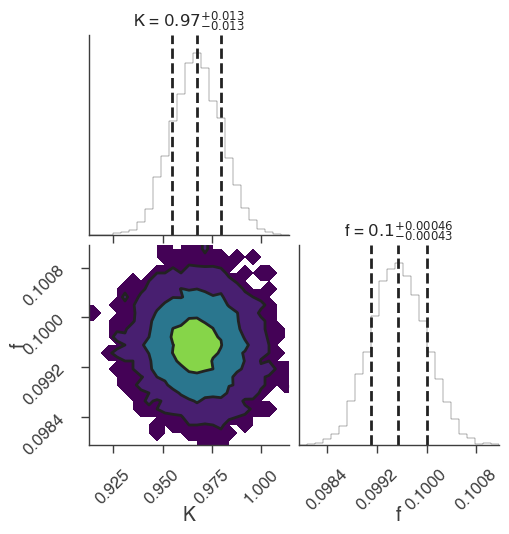

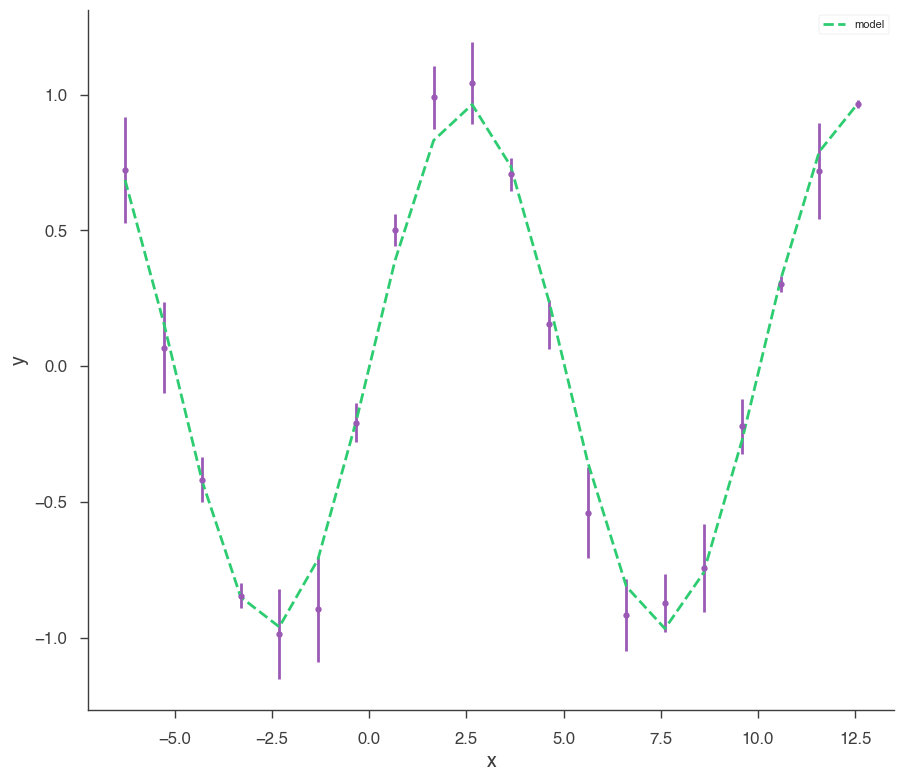

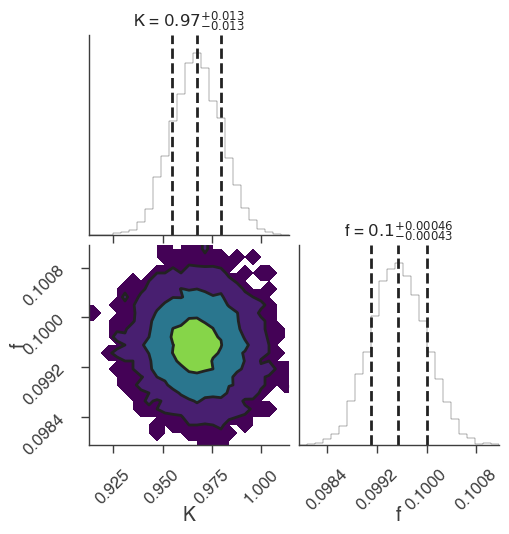

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

22:51:30 INFO      sampler set to ultranest                                                ]8;id=303941;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=575999;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-6  


[ultranest] Likelihood function evaluations: 14826


[ultranest]   logZ = -15.14 +- 0.07924


[ultranest] Effective samples strategy satisfied (ESS = 976.5, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.41, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.08 tail:0.41 total:0.41 required:<0.50


[ultranest] done iterating.


22:51:46 INFO      fit restored to maximum of posterior                                         ]8;id=710604;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=375035;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=10025;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=153507;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.65 -0.11 +0.15) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.95 -0.05 +0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-5.752284
total,-5.752284


Values of statistical measures:

,statistical measures
AIC,16.210451
BIC,17.496033
DIC,15.552865
PDIC,2.029500
log(Z),-6.564287


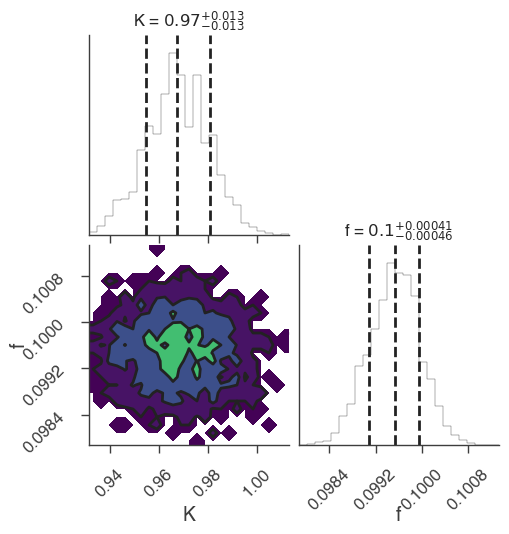

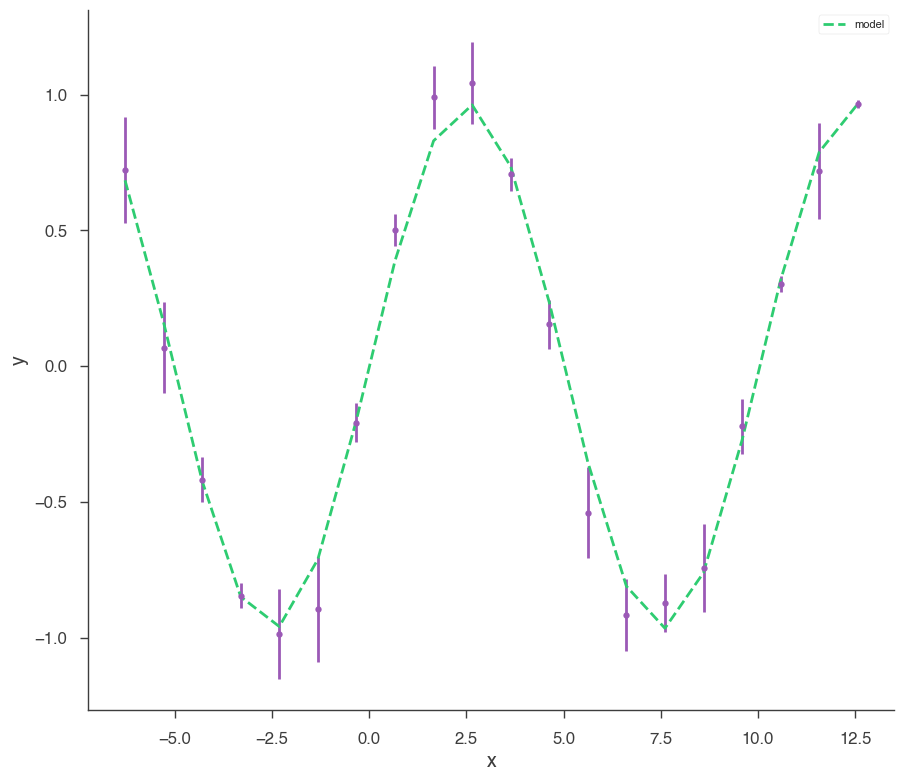

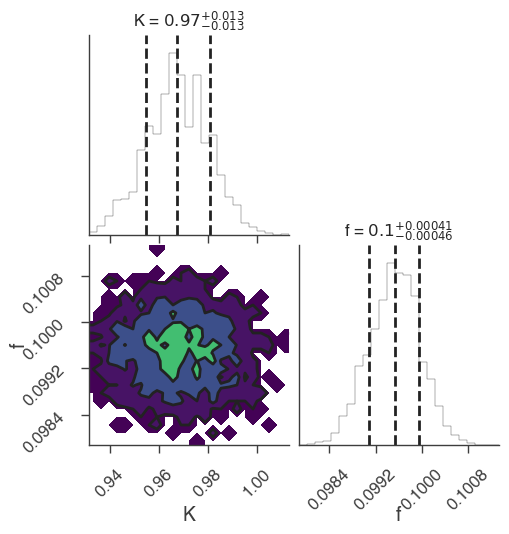

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()